In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## GUIDE

Attribute Information:

date time year-month-day hour:minute:second
Temperature, in Celsius
Relative Humidity, %
Light, in Lux
CO2, in ppm
Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

In [8]:
#read cvs file into dataframe
df = pd.read_csv('occupancydatatest.txt')

# View the first few rows of the dataframe
df.head(15)



,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1
145,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.000000,0.004779,1
146,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1
147,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.000000,0.004783,1
148,2015-02-02 14:26:59,23.7540,26.350,476.000000,803.200000,0.004794,1
149,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1


In [9]:
print(df.shape)

(2665, 7)


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [11]:
df.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [12]:
# Remove the column you want using the drop() function and specifying the axis=1 (column)
df = df.drop('date', axis=1)

# Save the new DataFrame without the column
df.to_csv('newoccupancydatatest.csv', index=False)

df.head(15)


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,23.7000,26.272,585.200000,749.200000,0.004764,1
141,23.7180,26.290,578.400000,760.400000,0.004773,1
142,23.7300,26.230,572.666667,769.666667,0.004765,1
143,23.7225,26.125,493.750000,774.750000,0.004744,1
144,23.7540,26.200,488.600000,779.000000,0.004767,1
145,23.7600,26.260,568.666667,790.000000,0.004779,1
146,23.7300,26.290,536.333333,798.000000,0.004776,1
147,23.7540,26.290,509.000000,797.000000,0.004783,1
148,23.7540,26.350,476.000000,803.200000,0.004794,1
149,23.7360,26.390,510.000000,809.000000,0.004796,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  82


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


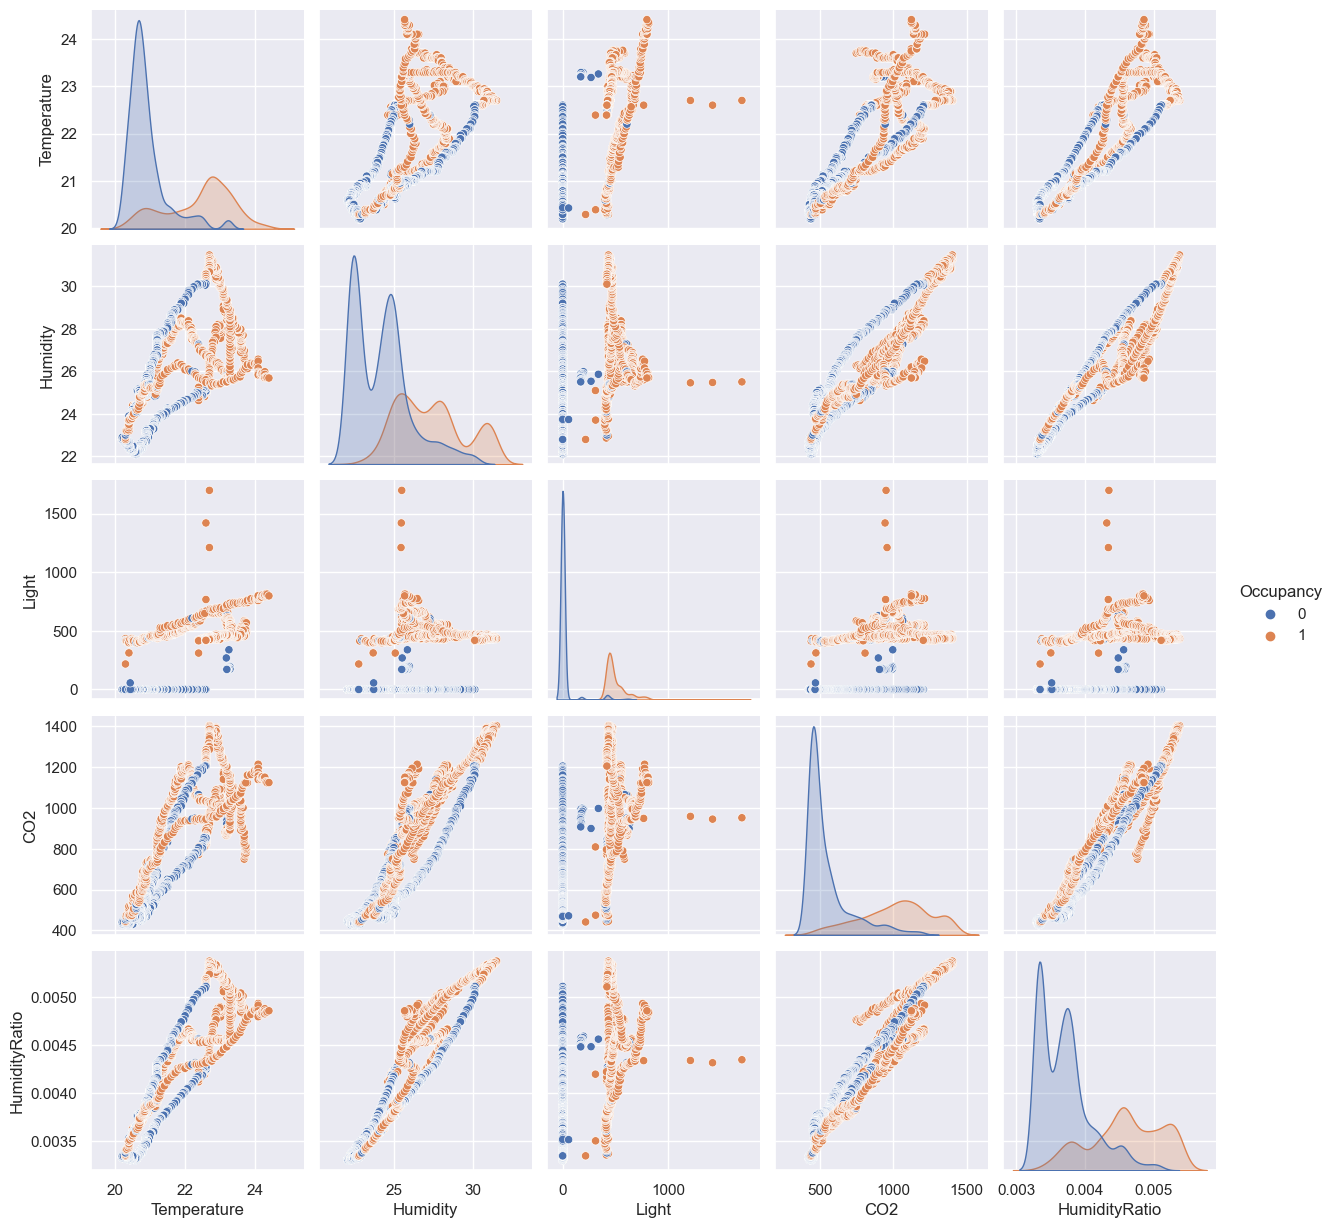

In [10]:
sns.pairplot(df, hue='Occupancy')
plt.show()

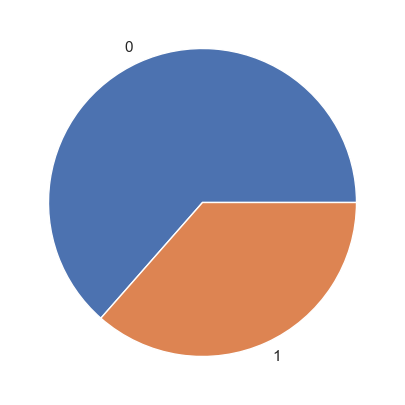

In [14]:
y =df['Occupancy']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

## Data Matrix

In [15]:
X = df.drop(columns=['Occupancy'])
X.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.7000,26.272,585.200000,749.200000,0.004764
141,23.7180,26.290,578.400000,760.400000,0.004773
142,23.7300,26.230,572.666667,769.666667,0.004765
143,23.7225,26.125,493.750000,774.750000,0.004744
144,23.7540,26.200,488.600000,779.000000,0.004767
145,23.7600,26.260,568.666667,790.000000,0.004779
146,23.7300,26.290,536.333333,798.000000,0.004776
147,23.7540,26.290,509.000000,797.000000,0.004783
148,23.7540,26.350,476.000000,803.200000,0.004794
149,23.7360,26.390,510.000000,809.000000,0.004796


In [16]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,21.433876,1.028024,20.200000,20.650000,20.890000,22.356667,24.408333
Humidity,2665.0,25.353937,2.436842,22.100000,23.260000,25.000000,26.856667,31.472500
Light,2665.0,193.227556,250.210906,0.000000,0.000000,0.000000,442.500000,1697.250000
CO2,2665.0,717.906470,292.681718,427.500000,466.000000,580.500000,956.333333,1402.250000
HumidityRatio,2665.0,0.004027,0.000611,0.003303,0.003529,0.003815,0.004532,0.005378


## Data standardization

In [17]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.566862,0.106940,1.207540
1,2.222275,0.384202,1.539680,0.145214,1.221461
2,2.233950,0.359575,1.516762,0.176881,1.209161
3,2.226653,0.316478,1.201302,0.194253,1.174140
4,2.257300,0.347262,1.180715,0.208776,1.211522
5,2.263138,0.371888,1.500772,0.246367,1.232389
6,2.233950,0.384202,1.371524,0.273705,1.227154
7,2.257300,0.384202,1.262262,0.270288,1.238551
8,2.257300,0.408828,1.130348,0.291475,1.256571
9,2.239788,0.425246,1.266259,0.311296,1.260002


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,1.637048e-15,1.000188,-1.200466,-0.762651,-0.529149,0.897803,2.893916
Humidity,2665.0,-6.561356e-16,1.000188,-1.335559,-0.859444,-0.145271,0.616787,2.511328
Light,2665.0,2.448240e-15,1.000188,-0.772404,-0.772404,-0.772404,0.996436,6.012147
CO2,2665.0,1.149799e-16,1.000188,-0.992412,-0.860846,-0.469562,0.814781,2.338622
HumidityRatio,2665.0,6.348893e-17,1.000188,-1.185496,-0.815009,-0.347182,0.826469,2.212680


## Observations and variables

In [20]:
observations = list(df.index)
variables = list(df.columns)

## Box and Whisker Plots

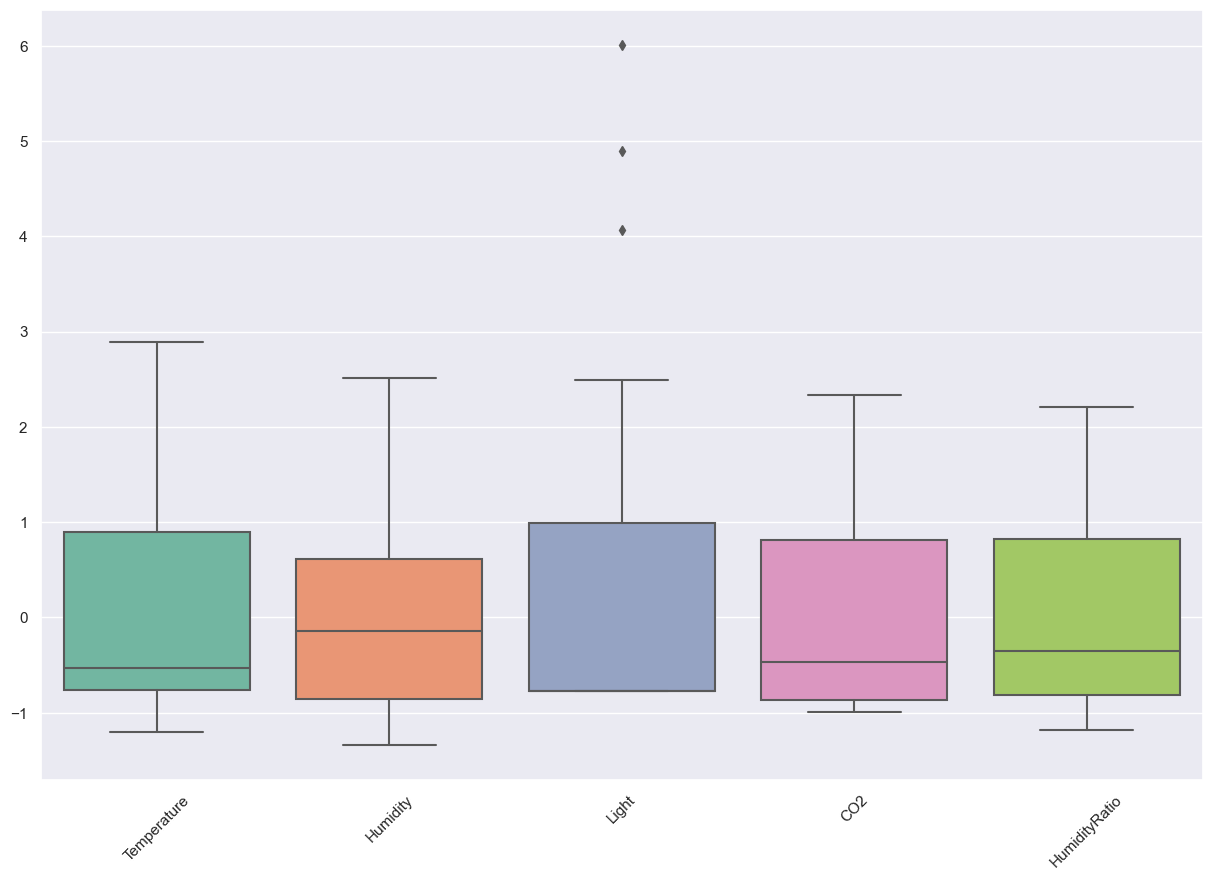

In [21]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
plt.show()

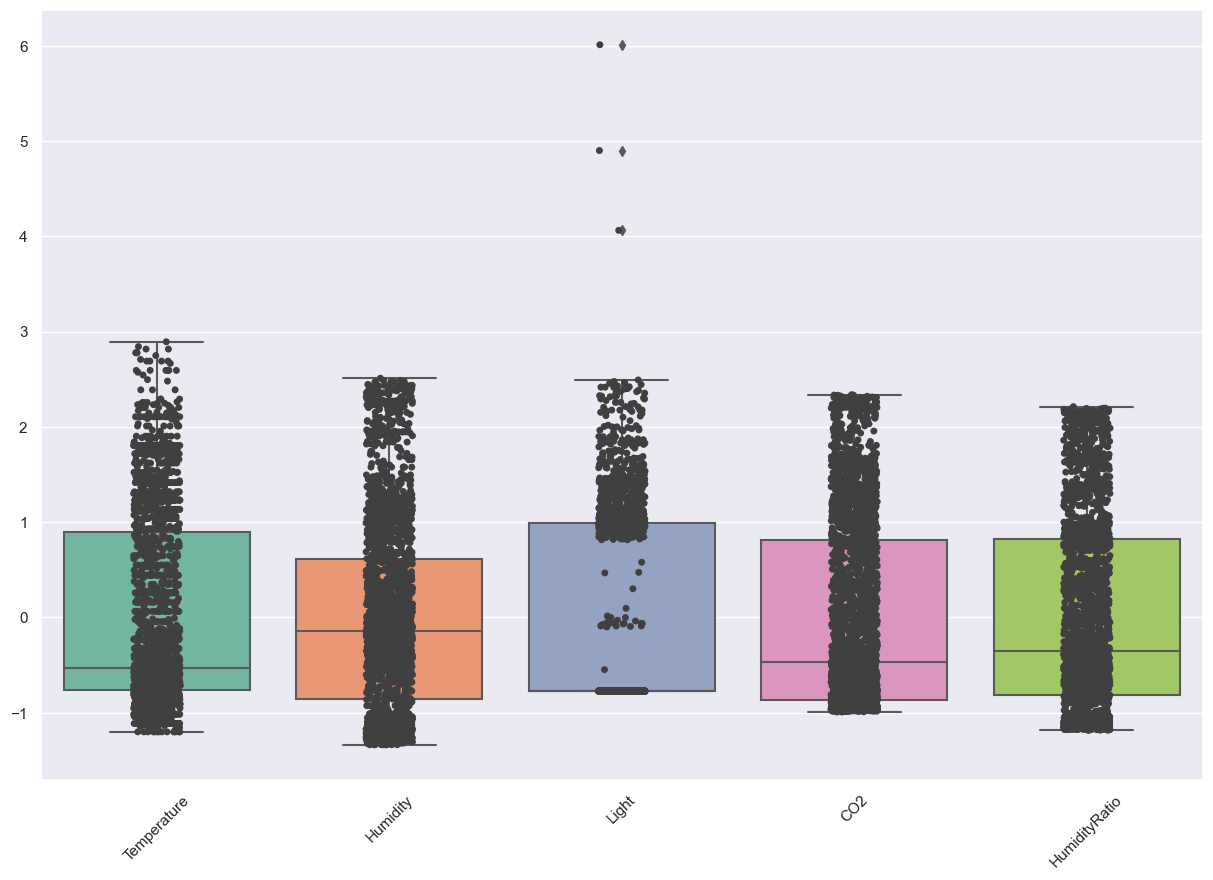

In [22]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

# set the figure size
ax = plt.figure(figsize=(15,10))

# create the boxplot with seaborn
ax = sns.boxplot(data=X, orient="v", palette="Set2")

# overlay the datapoints with stripplot or swarmplot
ax = sns.stripplot(data=X, color=".25")

# rotate the x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

plt.show()


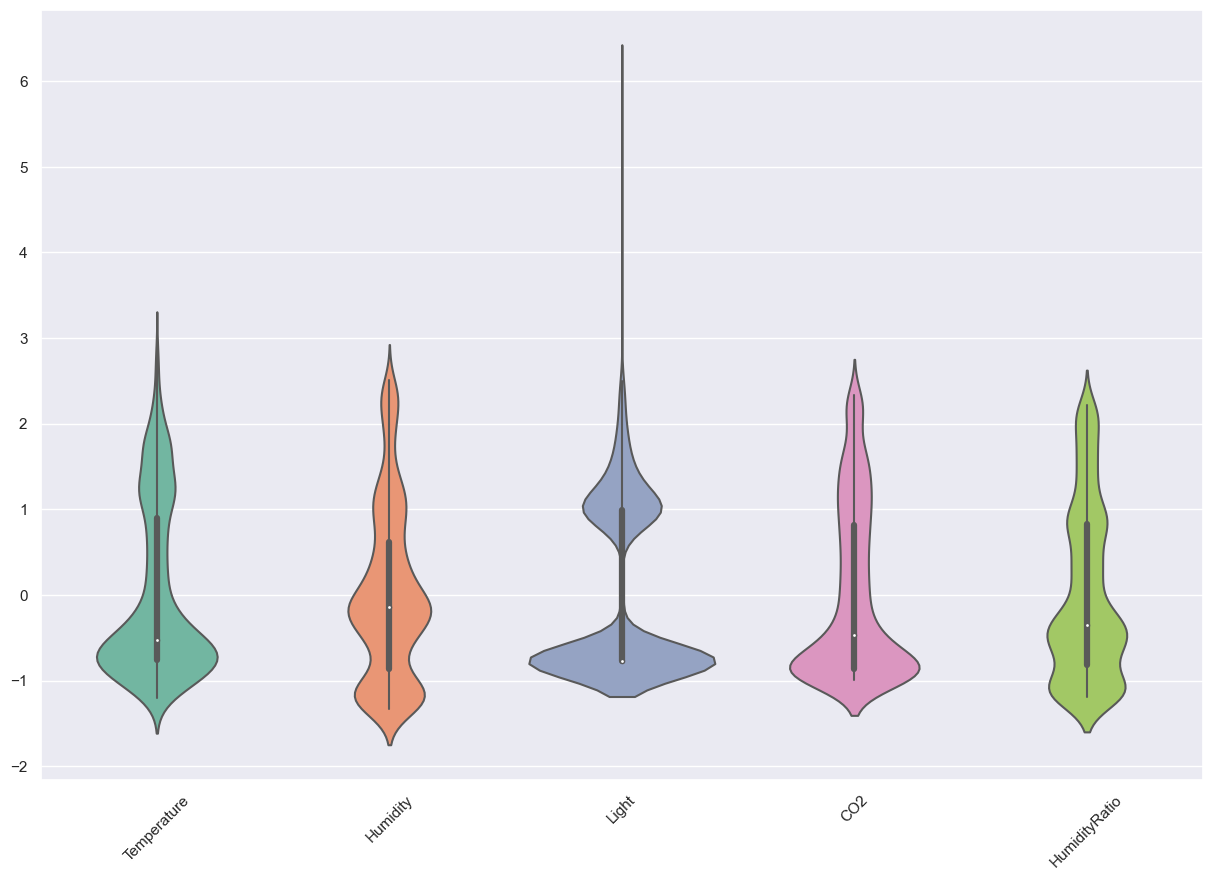

In [23]:
plt.figure(figsize=(15,10))
sns.violinplot(data=X, palette="Set2")
plt.xticks(rotation=45)
plt.show()


## Correlation matrix

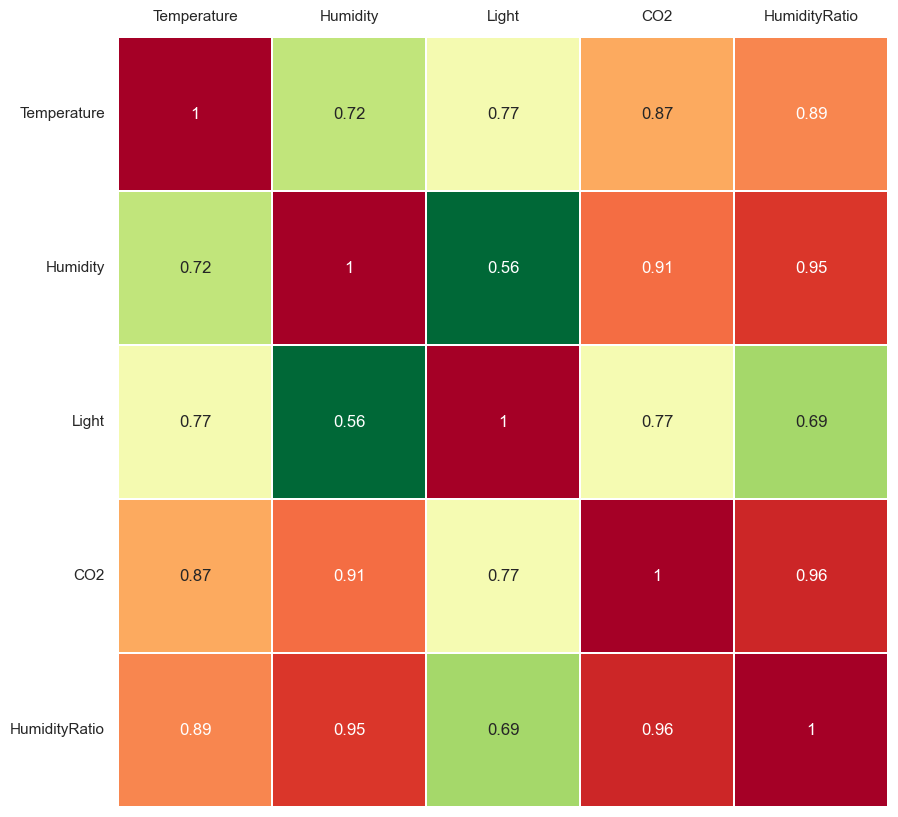

In [24]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
plt.show()

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis (PCA)

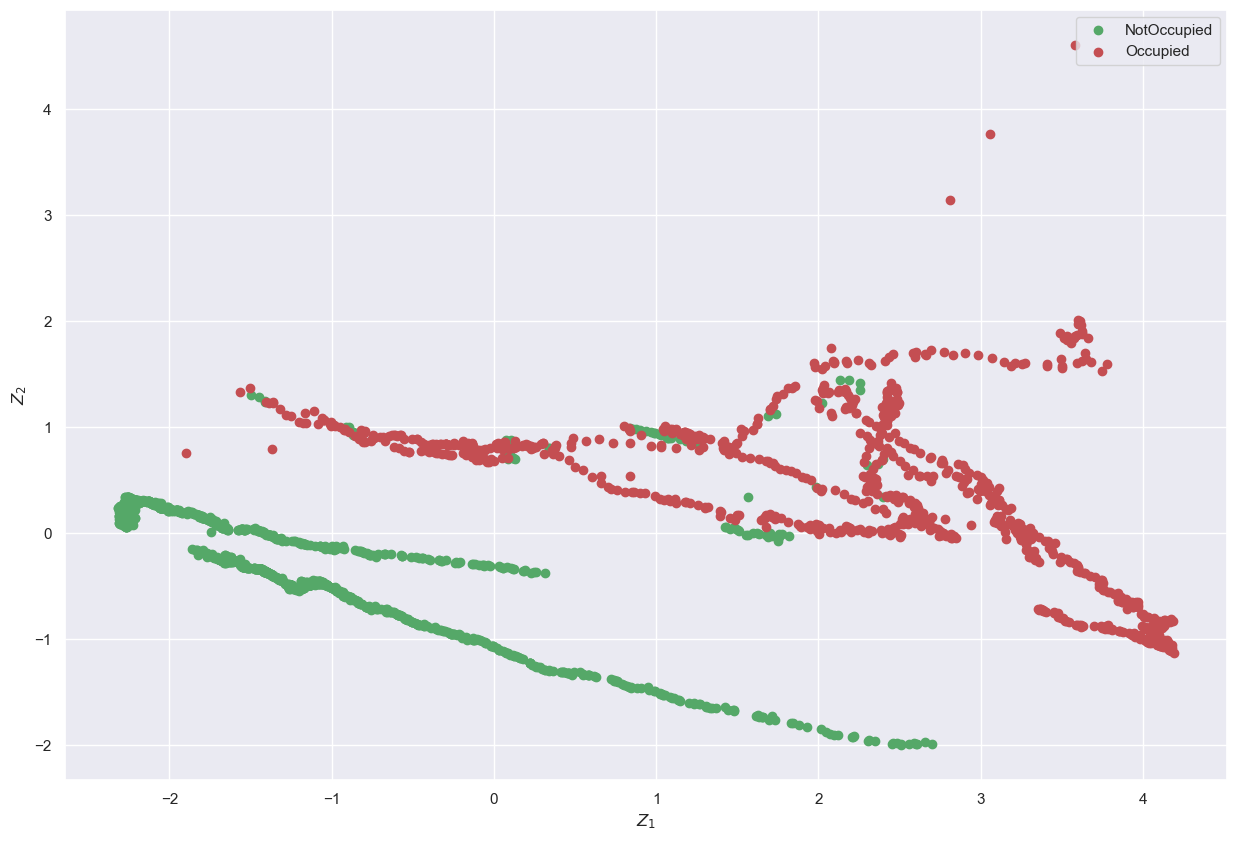

In [25]:
pca = PCA()
Z = pca.fit_transform(X)

# (Occupied)->1,  (NotOccupied)->0

idx_NotOccupied = np.where(y == 0)
idx_Occupied = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_NotOccupied,0], Z[idx_NotOccupied,1], c='g', label='NotOccupied')
plt.scatter(Z[idx_Occupied,0], Z[idx_Occupied,1], c='r', label='Occupied')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()


## Eigenvectors

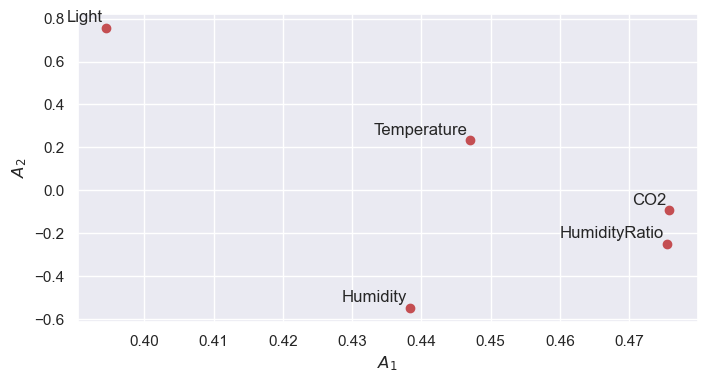

In [26]:
A = pca.components_.T 
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A
plt.show()

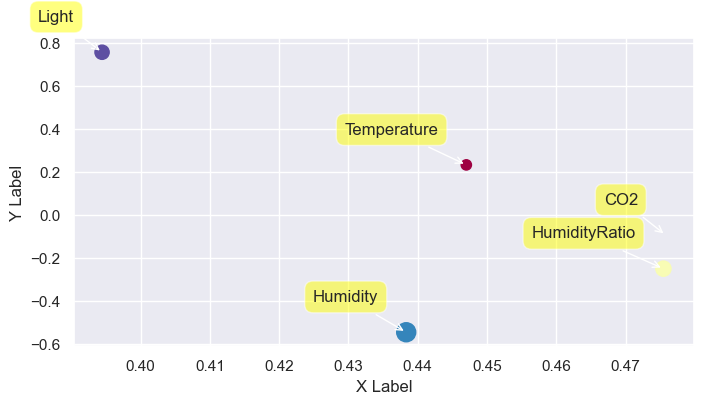

In [28]:
plt.figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('X Label')
plt.ylabel('Y Label')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-20, 20),
                 textcoords='offset points', ha='right', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

## Scree plot

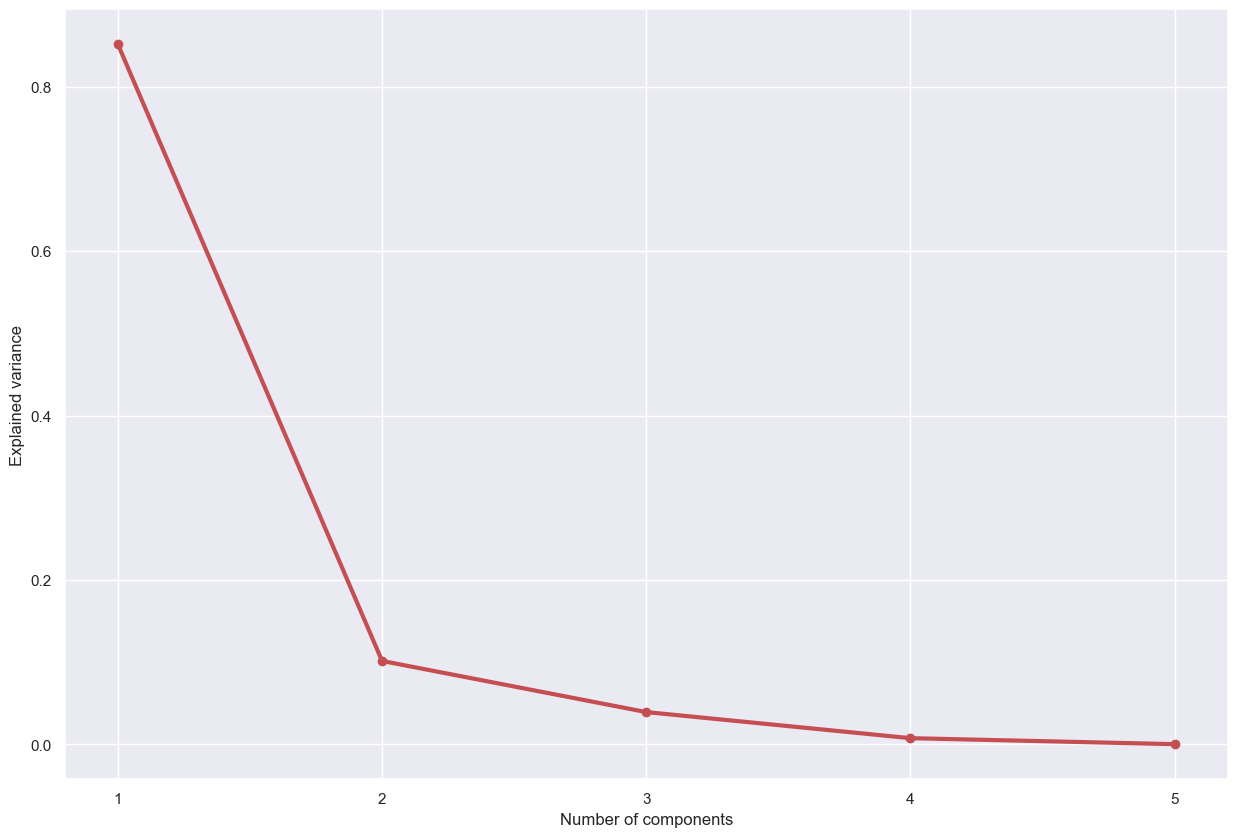

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

plt.show()

## Explained Variance

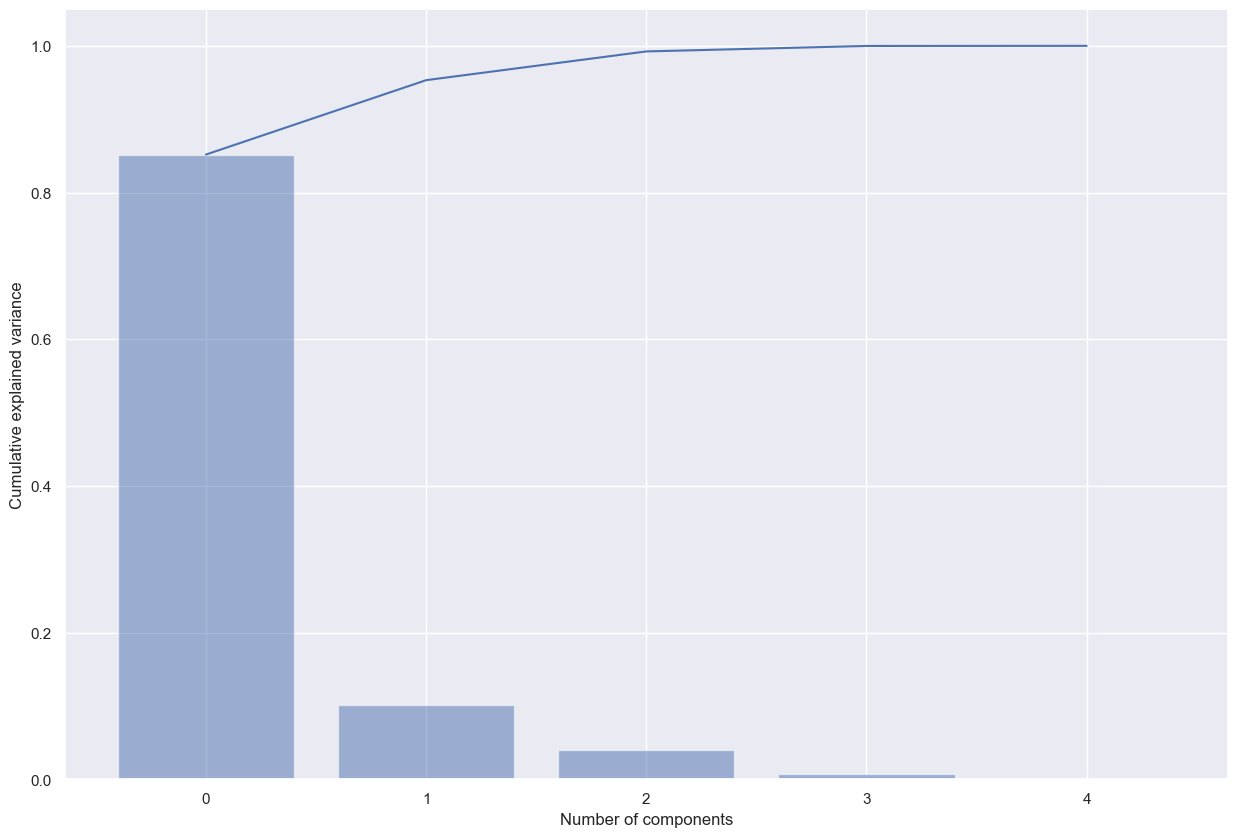

In [30]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [31]:
from tabulate import tabulate

ell = pca.explained_variance_ratio_
cum_ell = np.cumsum(ell)

# create a table with the data
table_data = []
for i in range(len(ell)):
    table_data.append([i+1, ell[i], cum_ell[i]])

table_header = ['Component', 'Explained Variance', 'Cumulative Explained Variance']

# print the table
print(tabulate(table_data, headers=table_header, tablefmt='grid'))


+-------------+----------------------+---------------------------------+
|   Component |   Explained Variance |   Cumulative Explained Variance |
+=============+======================+=================================+
|           1 |          0.85177     |                        0.85177  |
+-------------+----------------------+---------------------------------+
|           2 |          0.101427    |                        0.953197 |
+-------------+----------------------+---------------------------------+
|           3 |          0.0391922   |                        0.992389 |
+-------------+----------------------+---------------------------------+
|           4 |          0.00745465  |                        0.999844 |
+-------------+----------------------+---------------------------------+
|           5 |          0.000156425 |                        1        |
+-------------+----------------------+---------------------------------+


## Biplot

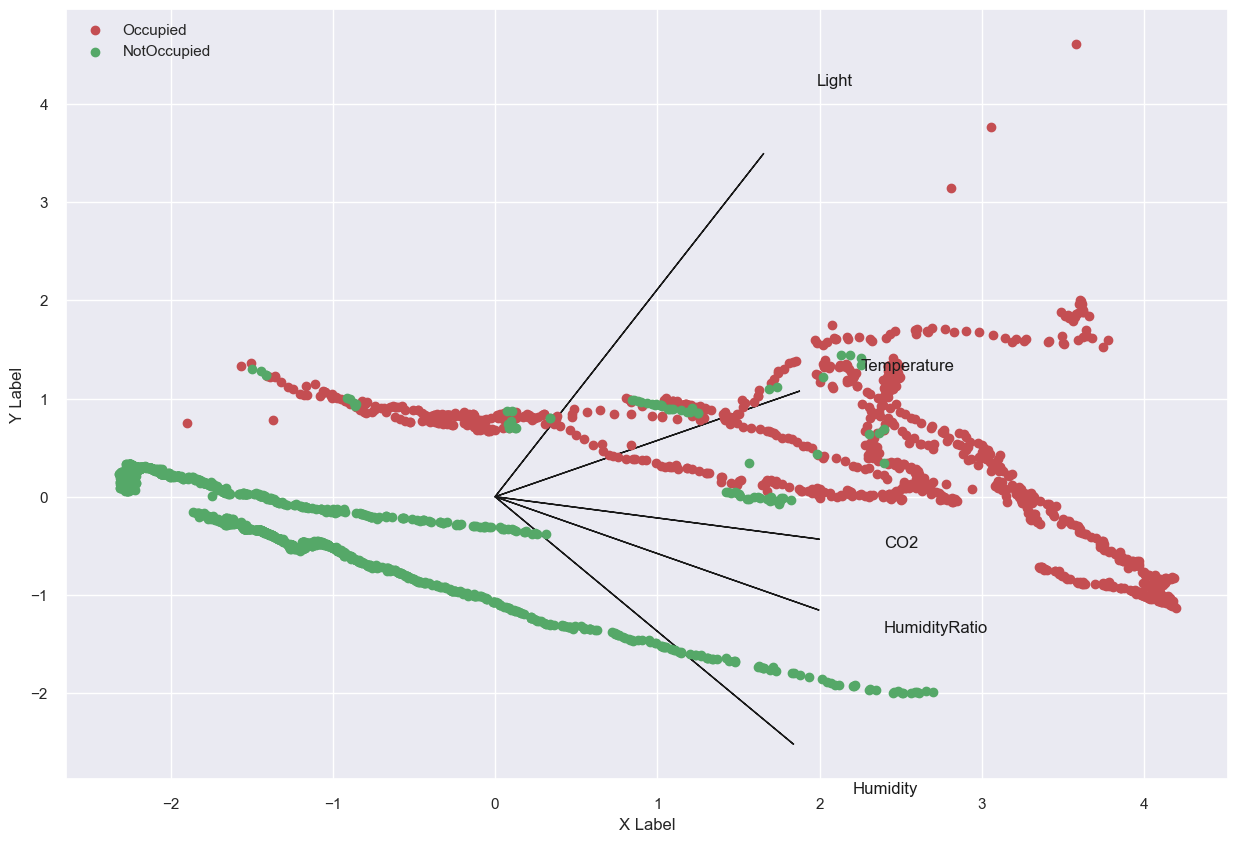

In [31]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('X Label')
plt.ylabel('Y Label')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Occupied,0], Z[idx_Occupied,1], c='r', label='Occupied')
plt.scatter(Z[idx_NotOccupied,0], Z[idx_NotOccupied,1], c='g', label='NotOccupied')

plt.legend(loc='upper left')
Z1
Z2

plt.show()

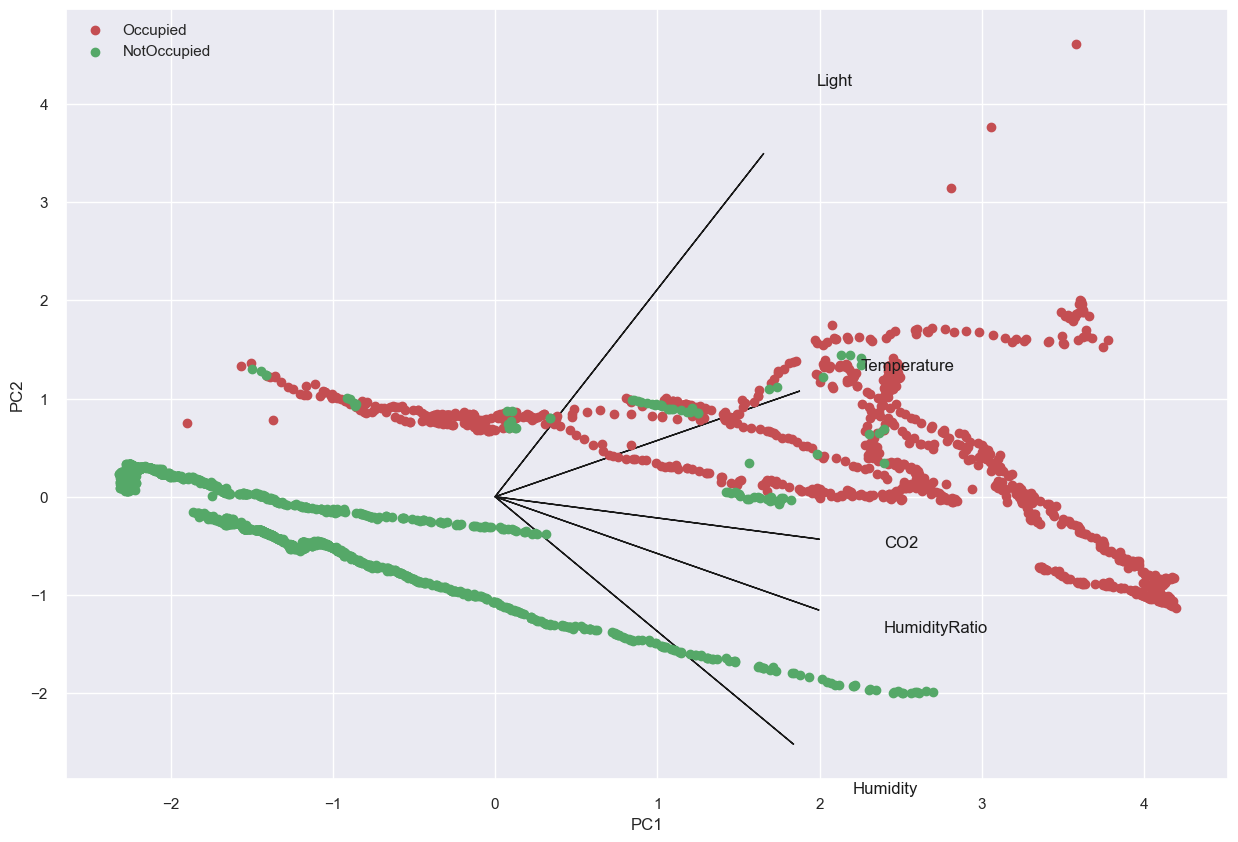

In [32]:
plt.figure(figsize=(15,10))
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(A1)):
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Occupied,0], Z[idx_Occupied,1], c='r', label='Occupied')
plt.scatter(Z[idx_NotOccupied,0], Z[idx_NotOccupied,1], c='g', label='NotOccupied')

plt.legend(loc='upper left')
plt.show()


## Using PCA Library

In [32]:
!pip install pca

In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


## Principal Components

In [34]:
out['PC']

,PC1,PC2
0,2.393796,1.183934
1,2.418970,1.156295
2,2.413574,1.155220
3,2.258606,0.945017
4,2.302363,0.908998
...,...,...
2660,3.601424,1.966538
2661,3.608329,1.972136
2662,3.602353,2.005934
2663,3.609167,1.997557


## Scatter Plot

[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].


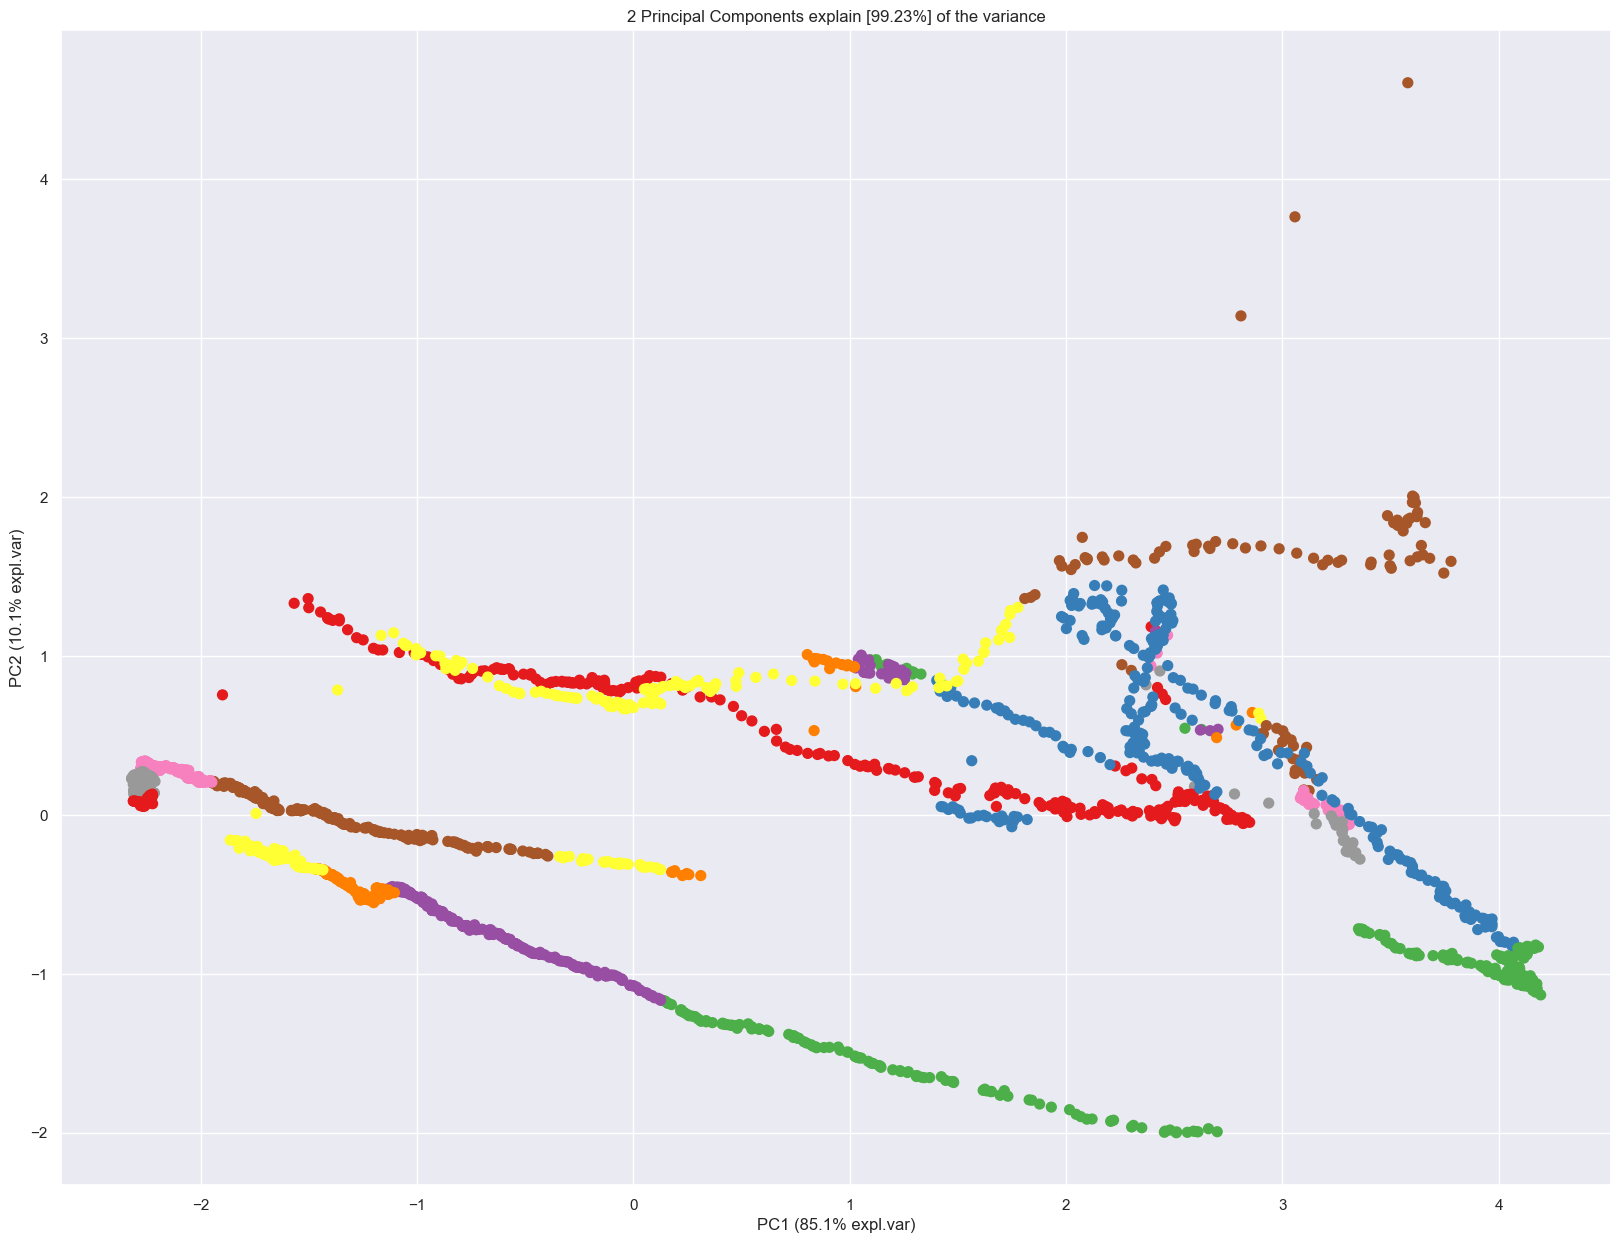

In [35]:
model.scatter(label=None, legend=False)
plt.show()

## Eigenvectors

In [36]:
A = out['loadings'].T
A

,PC1,PC2
Temperature,0.447017,0.233256
Humidity,0.438341,-0.546889
Light,0.394437,0.758298
CO2,0.475797,-0.093694
HumidityRatio,0.475468,-0.250421


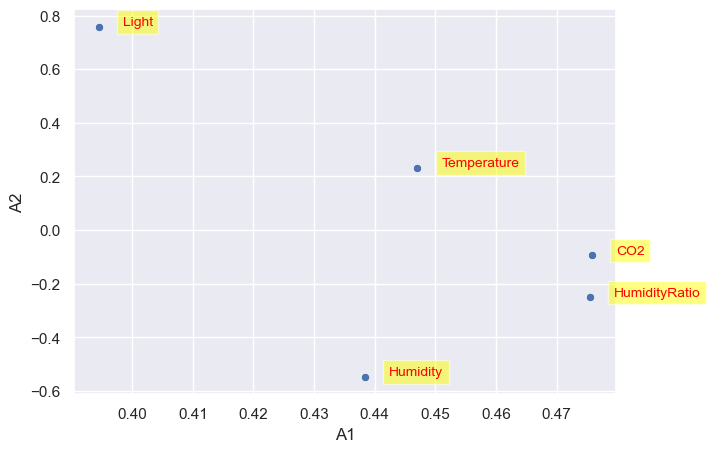

In [37]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.004,y=A.PC2[i]+0.005, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

## Scree Plot

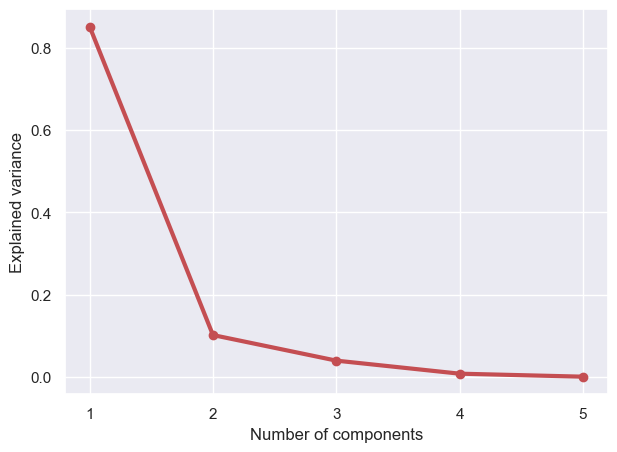

In [38]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

## Explained Variance Plot

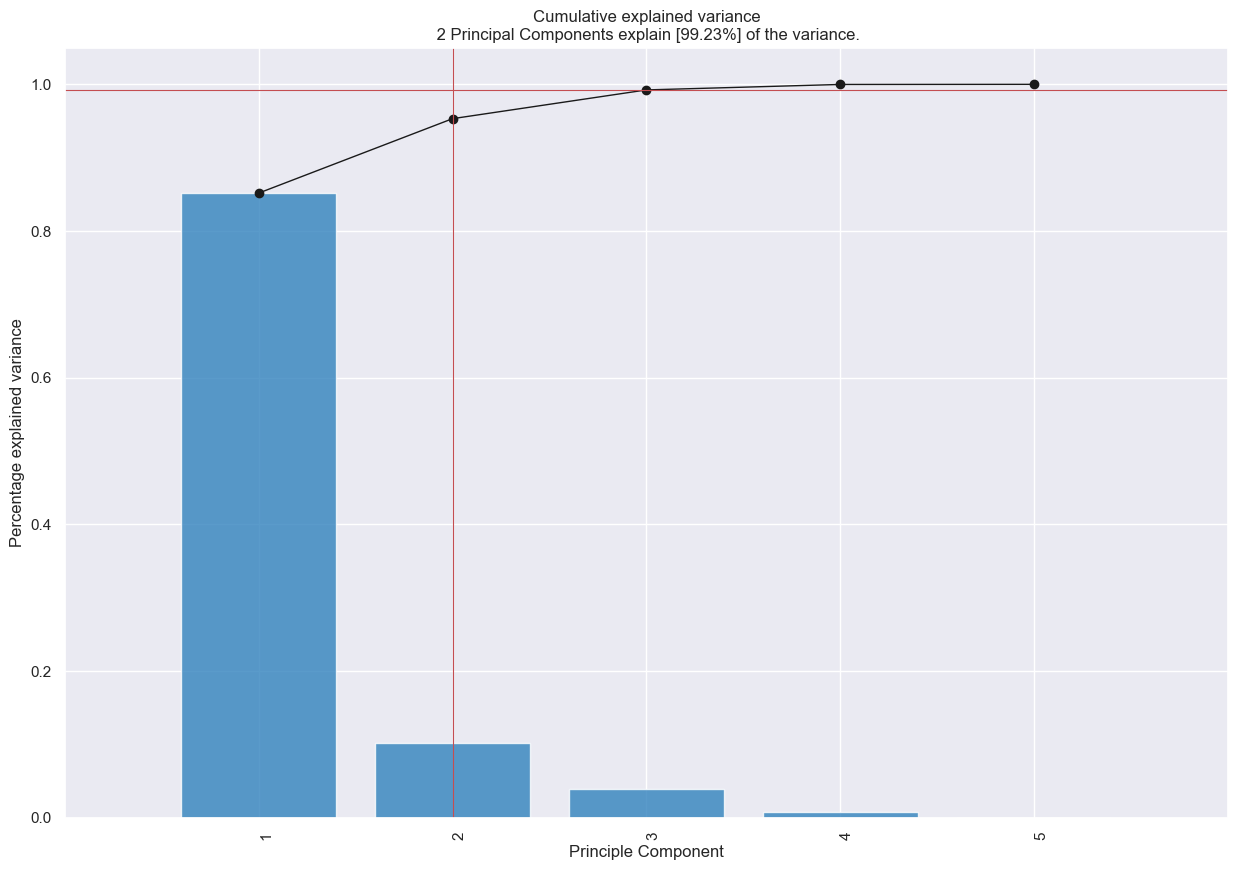

<Figure size 700x500 with 0 Axes>

In [39]:
model.plot();

## Biplot

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [2665] unique colors! Available unique colors: [9].
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


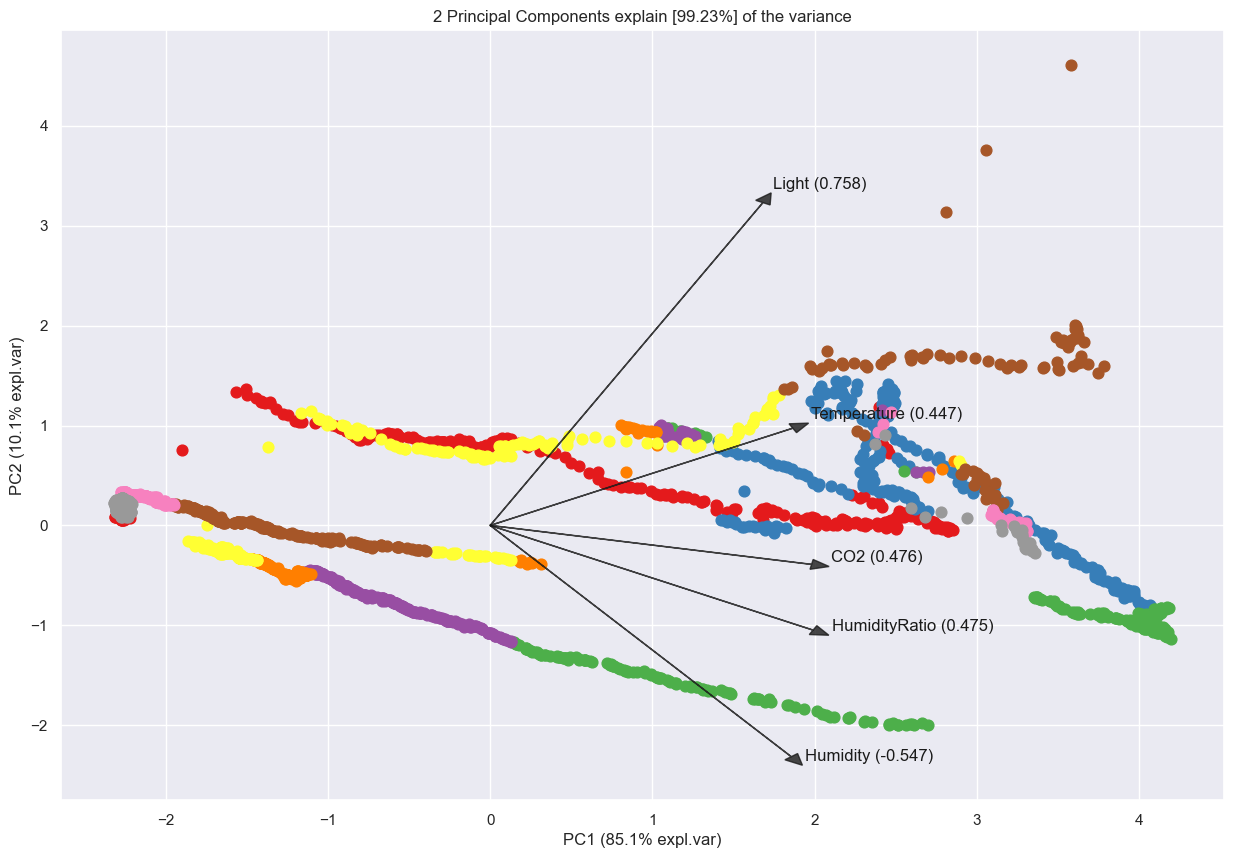

In [40]:
model.biplot(label=False, legend=False, color_arrow='k')
plt.show()

In [42]:
model.biplot3d(legend=False)
plt.show()

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


## Classification using Pycaret

In [41]:
pip install pycaret


Note: you may need to restart the kernel to use updated packages.


In [42]:
#to check the installed version
from pycaret.utils import version
version()

'3.0.0'

In [43]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2132, 6)
Unseen Data For Predictions: (533, 6)


In [44]:
from pycaret.classification import *
clf = setup(data=data, target='Occupancy', train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(2132, 6)"
4,Transformed data shape,"(2132, 6)"
5,Transformed train set shape,"(1705, 6)"
6,Transformed test set shape,"(427, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


## Comparing All Models ## before ## applying PCA

In [45]:
#show the best model and their statistics
#comparison among classification models before applying PCA
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9889,0.9975,0.9874,0.9829,0.9850,0.9761,0.9763,0.8320
xgboost,Extreme Gradient Boosting,0.9883,0.9977,0.9905,0.9784,0.9843,0.9749,0.9751,0.8020
lightgbm,Light Gradient Boosting Machine,0.9877,0.9978,0.9857,0.9814,0.9834,0.9736,0.9738,0.9380
rf,Random Forest Classifier,0.9865,0.9973,0.9905,0.9739,0.9820,0.9712,0.9714,0.8530
knn,K Neighbors Classifier,0.9847,0.9945,0.9858,0.9737,0.9796,0.9674,0.9676,0.7080
gbc,Gradient Boosting Classifier,0.9847,0.9972,0.9858,0.9737,0.9796,0.9674,0.9676,0.8260
ada,Ada Boost Classifier,0.9836,0.9967,0.9842,0.9723,0.9781,0.9649,0.9652,0.8170
dt,Decision Tree Classifier,0.9830,0.9816,0.9763,0.9780,0.9770,0.9635,0.9637,0.7480
lr,Logistic Regression,0.9777,0.9943,1.0000,0.9439,0.9710,0.9529,0.9541,1.4460
lda,Linear Discriminant Analysis,0.9777,0.9935,1.0000,0.9439,0.9710,0.9529,0.9541,0.7450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [47]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Create a Model

### Extra Trees Classifier (before applying PCA)

In [48]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9825,0.9935,0.9688,0.9841,0.9764,0.9624,0.9625
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
3,0.9942,0.9988,1.0000,0.9846,0.9922,0.9876,0.9876
4,0.9825,0.9994,0.9524,1.0000,0.9756,0.9619,0.9626
5,0.9941,0.9990,1.0000,0.9844,0.9921,0.9874,0.9875
6,0.9824,0.9935,0.9683,0.9839,0.9760,0.9620,0.9621
7,0.9765,0.9919,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9941,0.9994,1.0000,0.9844,0.9921,0.9874,0.9875


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [49]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9966,1.0000,0.9275,0.9624,0.9385,0.9403
1,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
2,0.9766,0.9985,1.0000,0.9412,0.9697,0.9507,0.9518
3,0.9825,0.9988,1.0000,0.9552,0.9771,0.9629,0.9636
4,0.9766,0.9974,1.0000,0.9403,0.9692,0.9504,0.9516
5,0.9941,0.9985,1.0000,0.9844,0.9921,0.9874,0.9875
6,0.9765,0.9978,1.0000,0.9403,0.9692,0.9502,0.9514
7,0.9647,0.9914,1.0000,0.9130,0.9545,0.9258,0.9284
8,0.9882,0.9985,1.0000,0.9692,0.9844,0.9749,0.9753


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [50]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Evaluate Extra Trees Classifier

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

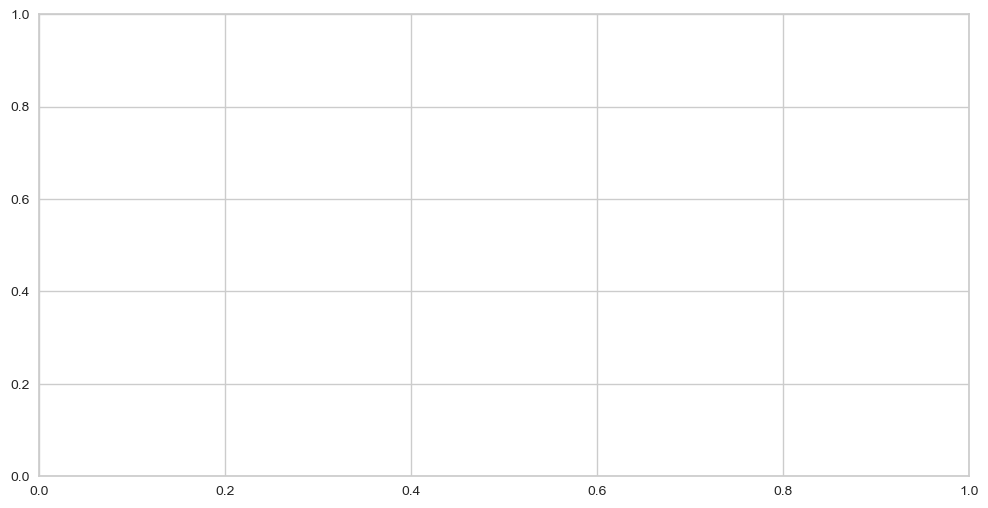

In [51]:
evaluate_model(tuned_et)

### Create Model

### Random Forest Classifier (rf) (Before applying PCA)

In [67]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9911,0.9688,0.9394,0.9538,0.9256,0.9258
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9883,0.9997,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9825,0.9917,1.0000,0.9552,0.9771,0.9629,0.9636
4,0.9883,0.9994,1.0000,0.9692,0.9844,0.9750,0.9753
5,0.9941,0.9927,1.0000,0.9844,0.9921,0.9874,0.9875
6,0.9824,0.9905,0.9841,0.9688,0.9764,0.9623,0.9624
7,0.9765,0.9898,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9824,0.9986,0.9841,0.9688,0.9764,0.9623,0.9624


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9915,1.0000,0.9275,0.9624,0.9385,0.9403
1,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
2,0.9766,0.9936,1.0000,0.9412,0.9697,0.9507,0.9518
3,0.9649,0.9879,1.0000,0.9143,0.9552,0.9265,0.9290
4,0.9766,0.9917,1.0000,0.9403,0.9692,0.9504,0.9516
5,0.9765,0.9946,1.0000,0.9403,0.9692,0.9502,0.9514
6,0.9765,0.9955,1.0000,0.9403,0.9692,0.9502,0.9514
7,0.9588,0.9918,1.0000,0.9000,0.9474,0.9137,0.9171
8,0.9765,0.9945,1.0000,0.9403,0.9692,0.9502,0.9514


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
tuned_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

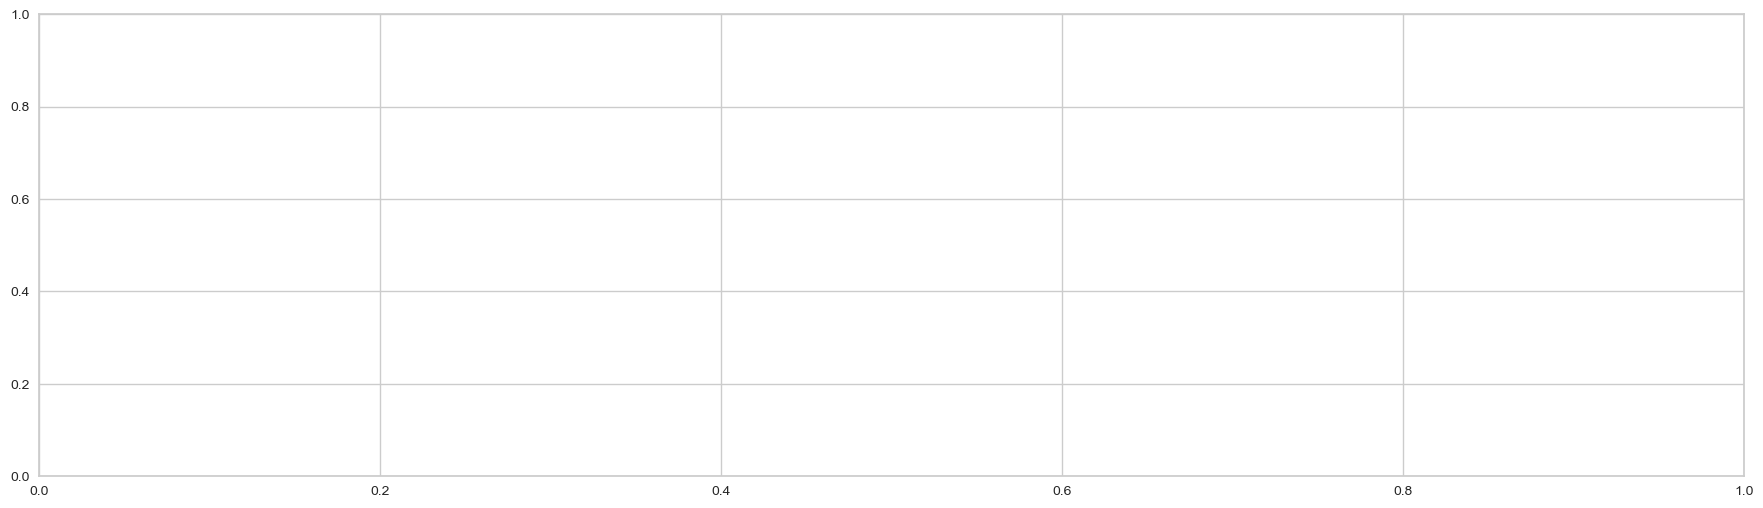

In [73]:
evaluate_model(tuned_rf)

### Create Model

### Light Gradient Boosting Machine (lightgbm) (Before applying PCA)


In [70]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9945,0.9688,0.9538,0.9612,0.9378,0.9378
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9883,0.9993,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9883,0.9939,1.0000,0.9697,0.9846,0.9752,0.9755
4,0.9649,0.9963,0.9365,0.9672,0.9516,0.9241,0.9244
5,0.9882,0.9958,0.9841,0.9841,0.9841,0.9748,0.9748
6,0.9824,0.9924,0.9841,0.9688,0.9764,0.9623,0.9624
7,0.9765,0.9889,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9824,0.9976,0.9683,0.9839,0.9760,0.9620,0.9621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [71]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9953,0.9844,0.9403,0.9618,0.9382,0.9388
1,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
2,0.9883,0.9972,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9708,0.9947,1.0000,0.9275,0.9624,0.9385,0.9403
4,0.9708,0.9949,1.0000,0.9265,0.9618,0.9382,0.9400
5,0.9824,0.9980,0.9683,0.9839,0.9760,0.9620,0.9621
6,0.9706,0.9952,0.9841,0.9394,0.9612,0.9376,0.9382
7,0.9588,0.9887,0.9841,0.9118,0.9466,0.9132,0.9149
8,0.9824,0.9967,0.9841,0.9688,0.9764,0.9623,0.9624


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
tuned_lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

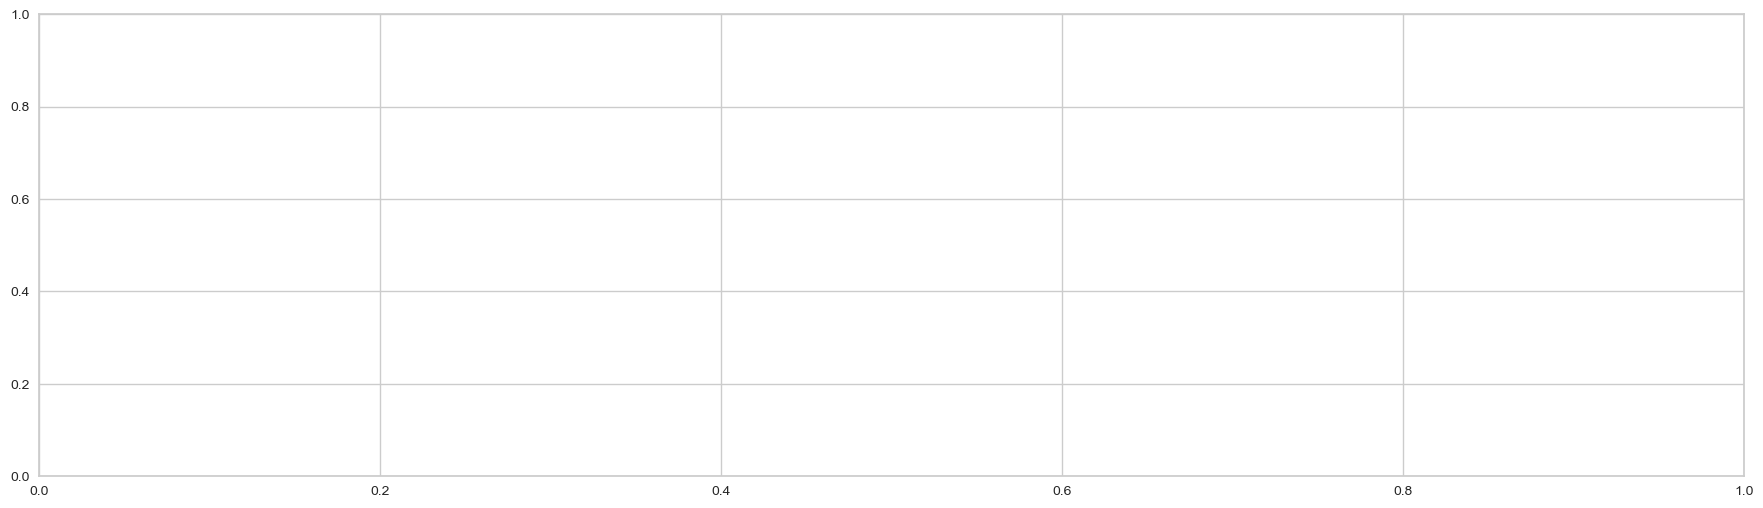

In [74]:
evaluate_model(tuned_lightgbm)

In [52]:
!pip install statsmodels --upgrade

### Classification + PCA

#### from here we consider PCA 

In [53]:
clf_pca = setup(data=data, target='Occupancy', train_size=0.8, session_id=123, normalize = True, pca = True, pca_components = 2)


,Description,Value
0,Session id,123
1,Target,Occupancy
2,Target type,Binary
3,Original data shape,"(2132, 6)"
4,Transformed data shape,"(2132, 3)"
5,Transformed train set shape,"(1705, 3)"
6,Transformed test set shape,"(427, 3)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


## Comparing Models ##after## applying PCA

In [54]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9853,0.9957,0.9858,0.9751,0.9803,0.9686,0.9688,0.8970
rf,Random Forest Classifier,0.9830,0.9951,0.9921,0.9636,0.9775,0.9639,0.9642,0.8970
lightgbm,Light Gradient Boosting Machine,0.9818,0.9956,0.9810,0.9705,0.9756,0.9611,0.9613,0.8020
xgboost,Extreme Gradient Boosting,0.9806,0.9947,0.9858,0.9631,0.9743,0.9588,0.9590,0.8400
knn,K Neighbors Classifier,0.9783,0.9935,0.9795,0.9631,0.9711,0.9537,0.9540,0.7770
gbc,Gradient Boosting Classifier,0.9777,0.9956,0.9842,0.9574,0.9705,0.9526,0.9530,0.8820
dt,Decision Tree Classifier,0.9765,0.9752,0.9700,0.9671,0.9685,0.9498,0.9499,0.7660
ada,Ada Boost Classifier,0.9730,0.9933,0.9747,0.9543,0.9642,0.9425,0.9429,0.8290
qda,Quadratic Discriminant Analysis,0.9683,0.9849,1.0000,0.9218,0.9592,0.9334,0.9356,0.7980
svm,SVM - Linear Kernel,0.9677,0.0000,0.9984,0.9217,0.9584,0.9321,0.9343,0.7930


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Best model with PCA

In [55]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

### Tune Best Model: ExtraTreesClassifier

In [56]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9949,1.0000,0.9275,0.9624,0.9385,0.9403
1,0.9883,1.0000,1.0000,0.9697,0.9846,0.9752,0.9755
2,0.9708,0.9952,1.0000,0.9275,0.9624,0.9385,0.9403
3,0.9649,0.9943,1.0000,0.9143,0.9552,0.9265,0.9290
4,0.9708,0.9928,1.0000,0.9265,0.9618,0.9382,0.9400
5,0.9706,0.9954,1.0000,0.9265,0.9618,0.9380,0.9398
6,0.9647,0.9961,1.0000,0.9130,0.9545,0.9258,0.9284
7,0.9529,0.9895,1.0000,0.8873,0.9403,0.9017,0.9061
8,0.9706,0.9957,1.0000,0.9265,0.9618,0.9380,0.9398


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Evaluate Best Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

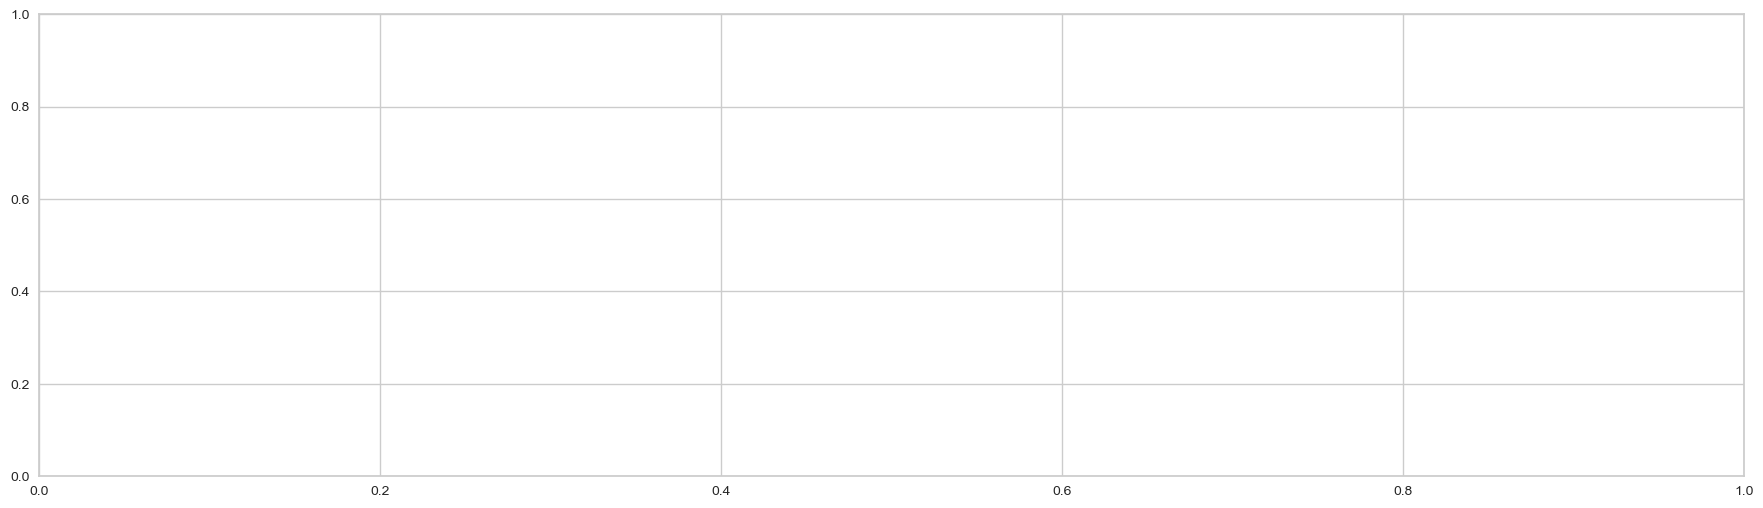

In [57]:
evaluate_model(tuned_best_model_pca)

### Create Extra Trees Classifier

In [58]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9915,0.9375,0.9677,0.9524,0.9246,0.9249
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
3,0.9883,0.9925,1.0000,0.9697,0.9846,0.9752,0.9755
4,0.9942,0.9999,1.0000,0.9844,0.9921,0.9875,0.9876
5,0.9941,0.9934,1.0000,0.9844,0.9921,0.9874,0.9875
6,0.9765,0.9967,0.9683,0.9683,0.9683,0.9496,0.9496
7,0.9765,0.9905,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9824,0.9935,0.9683,0.9839,0.9760,0.9620,0.9621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [59]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9949,1.0000,0.9275,0.9624,0.9385,0.9403
1,0.9883,1.0000,1.0000,0.9697,0.9846,0.9752,0.9755
2,0.9708,0.9952,1.0000,0.9275,0.9624,0.9385,0.9403
3,0.9649,0.9943,1.0000,0.9143,0.9552,0.9265,0.9290
4,0.9708,0.9928,1.0000,0.9265,0.9618,0.9382,0.9400
5,0.9706,0.9954,1.0000,0.9265,0.9618,0.9380,0.9398
6,0.9647,0.9961,1.0000,0.9130,0.9545,0.9258,0.9284
7,0.9529,0.9895,1.0000,0.8873,0.9403,0.9017,0.9061
8,0.9706,0.9957,1.0000,0.9265,0.9618,0.9380,0.9398


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

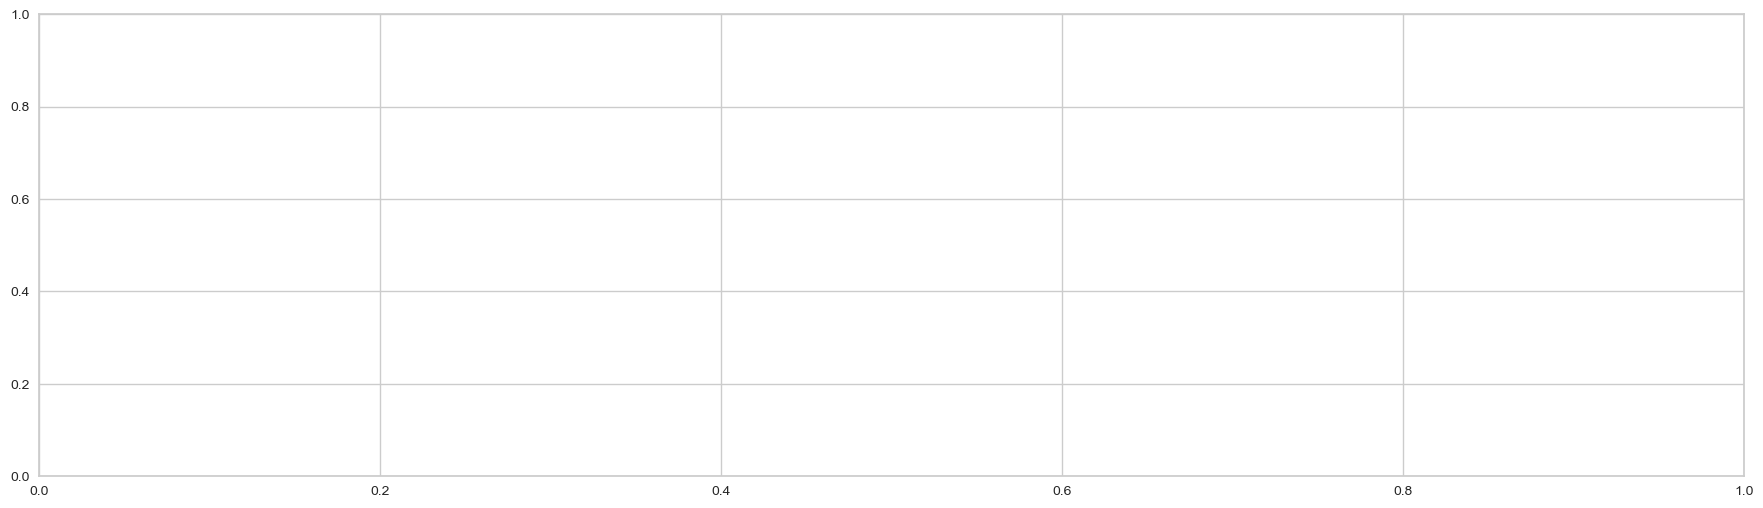

In [61]:
evaluate_model(tuned_et_pca)

### Create Random Forest Classifier (rf)


In [75]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9649,0.9911,0.9688,0.9394,0.9538,0.9256,0.9258
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9883,0.9997,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9825,0.9917,1.0000,0.9552,0.9771,0.9629,0.9636
4,0.9883,0.9994,1.0000,0.9692,0.9844,0.9750,0.9753
5,0.9941,0.9927,1.0000,0.9844,0.9921,0.9874,0.9875
6,0.9824,0.9905,0.9841,0.9688,0.9764,0.9623,0.9624
7,0.9765,0.9898,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9824,0.9986,0.9841,0.9688,0.9764,0.9623,0.9624


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9915,1.0000,0.9275,0.9624,0.9385,0.9403
1,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
2,0.9766,0.9936,1.0000,0.9412,0.9697,0.9507,0.9518
3,0.9649,0.9879,1.0000,0.9143,0.9552,0.9265,0.9290
4,0.9766,0.9917,1.0000,0.9403,0.9692,0.9504,0.9516
5,0.9765,0.9946,1.0000,0.9403,0.9692,0.9502,0.9514
6,0.9765,0.9955,1.0000,0.9403,0.9692,0.9502,0.9514
7,0.9588,0.9918,1.0000,0.9000,0.9474,0.9137,0.9171
8,0.9765,0.9945,1.0000,0.9403,0.9692,0.9502,0.9514


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
tuned_rf_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

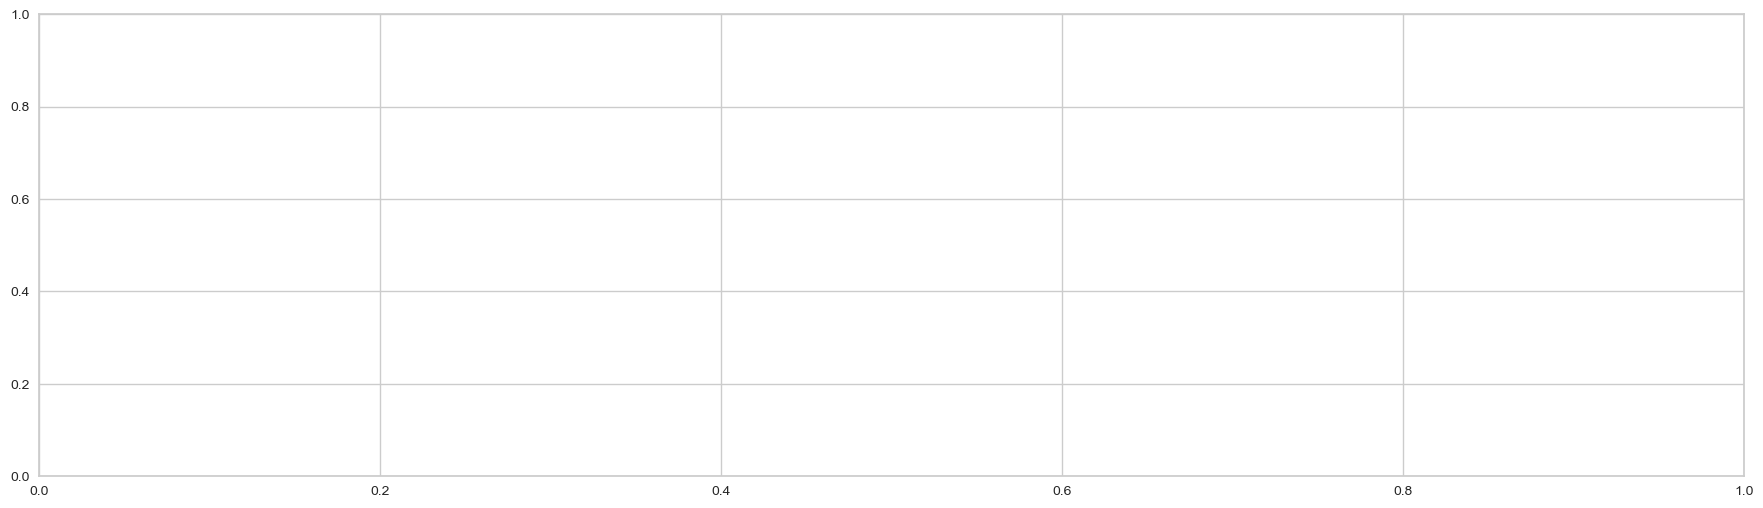

In [78]:
evaluate_model(tuned_rf_pca)

### Create Light Gradient Boosting Machine (lightgbm)


In [79]:
lightgbm_pca = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9945,0.9688,0.9538,0.9612,0.9378,0.9378
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9883,0.9993,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9883,0.9939,1.0000,0.9697,0.9846,0.9752,0.9755
4,0.9649,0.9963,0.9365,0.9672,0.9516,0.9241,0.9244
5,0.9882,0.9958,0.9841,0.9841,0.9841,0.9748,0.9748
6,0.9824,0.9924,0.9841,0.9688,0.9764,0.9623,0.9624
7,0.9765,0.9889,0.9841,0.9538,0.9688,0.9499,0.9502
8,0.9824,0.9976,0.9683,0.9839,0.9760,0.9620,0.9621


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
tuned_lightgbm_pca = tune_model(lightgbm_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9708,0.9953,0.9844,0.9403,0.9618,0.9382,0.9388
1,0.9942,1.0000,1.0000,0.9846,0.9922,0.9876,0.9876
2,0.9883,0.9972,1.0000,0.9697,0.9846,0.9752,0.9755
3,0.9708,0.9947,1.0000,0.9275,0.9624,0.9385,0.9403
4,0.9708,0.9949,1.0000,0.9265,0.9618,0.9382,0.9400
5,0.9824,0.9980,0.9683,0.9839,0.9760,0.9620,0.9621
6,0.9706,0.9952,0.9841,0.9394,0.9612,0.9376,0.9382
7,0.9588,0.9887,0.9841,0.9118,0.9466,0.9132,0.9149
8,0.9824,0.9967,0.9841,0.9688,0.9764,0.9623,0.9624


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
tuned_lightgbm_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

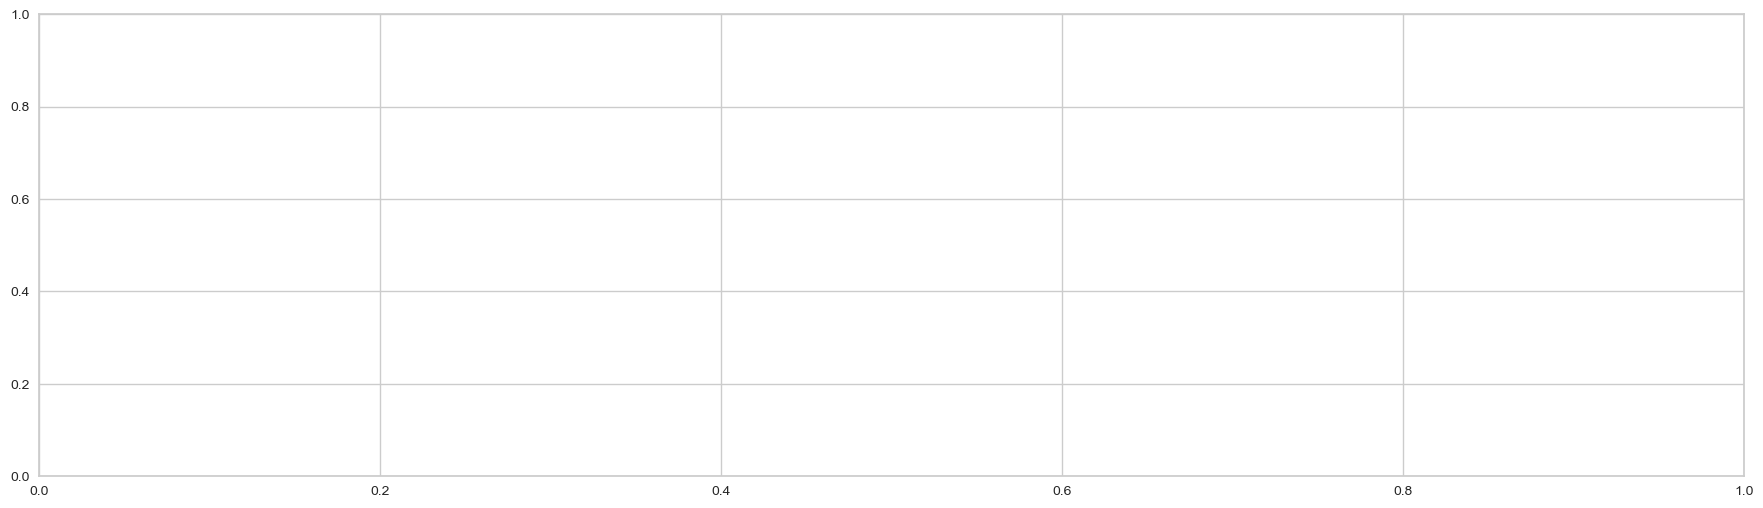

In [82]:
evaluate_model(tuned_lightgbm_pca)

## Explainable AI with Shapley values

In [62]:
!pip install shap

In [6]:
pip install pycaret[analysis]

  Using cached autoviz-0.1.601-py3-none-any.whl (67 kB)
  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached fairlearn-0.7.0-py3-none-any.whl (177 kB)
  Using cached interpret-0.3.2-py3-none-any.whl (1.4 kB)
  Using cached deepchecks-0.13.1-py3-none-any.whl (7.7 MB)
  Using cached explainerdashboard-0.4.2.1-py3-none-any.whl (286 kB)
     -------------------------------------- 153.3/153.3 kB 3.0 MB/s eta 0:00:00
  Using cached pyamg-5.0.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached PyNomaly-0.3.3-py3-none-any.whl
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached dtreeviz-2.2.1-py3-none-any.whl (91 kB)
  Using cached flask_simplelogin-0.1.1-py3-none-any.whl (7.2 kB)
  Using cached dash_bootstrap_components-1.4.1-py3-none-any.whl (220 kB)
  Using cached dash_auth-2.0.0-py3-none-any.whl (3.4 kB)
  Using cached gevent-22.10.

In [63]:
import shap

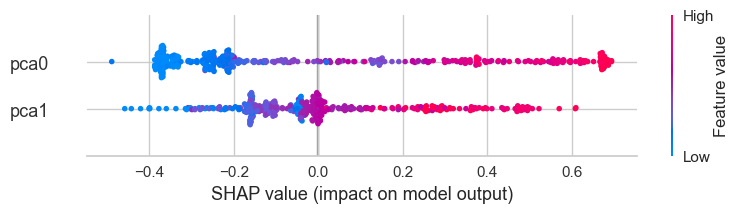

In [64]:
interpret_model(tuned_et_pca, plot='summary')

In [65]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [66]:
interpret_model(tuned_et_pca, plot='reason')